<a href="https://colab.research.google.com/github/abhhii/GuitarClassification/blob/master/GuitarClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
folder = 'acoustic'
file = 'urls_acoustic.csv'

In [0]:
folder = 'electric'
file = 'urls_electric.csv'

In [0]:
folder = 'archtop'
file = 'urls_archtop.csv'

In [0]:
folder = 'double_neck'
file = 'urls_double_neck.csv'

In [0]:
folder = 'resonator'
file = 'urls_resonator.csv'

In [0]:
path = Path(base_dir + 'data/guitars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/resonator'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/electric'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/archtop'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/urls_acoustic.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/urls_archtop.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/urls_double_neck.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/urls_electric.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/urls_resonator.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/double_neck'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/acoustic'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/guitars/models')]

In [0]:
classes = ['acoustic', 'electric', 'resonator', 'archtop', 'double_neck']

In [0]:
download_images(path/file, dest)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size=500)

acoustic


electric


resonator


archtop


double_neck


# Viewing the data

In [0]:
import numpy as np
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size = 224, 
                                  num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['acoustic', 'archtop', 'double_neck', 'electric', 'resonator']

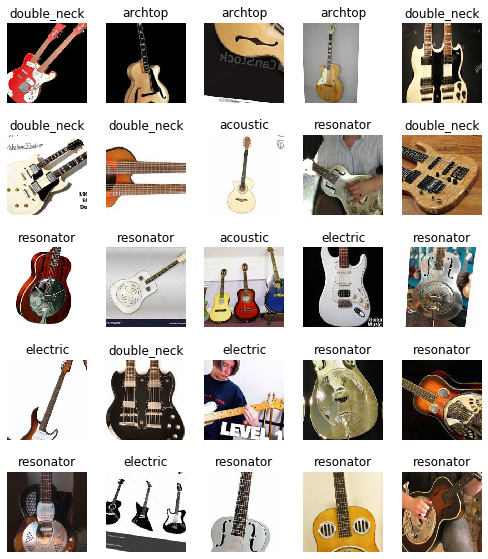

In [0]:
data.show_batch(row = 3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['acoustic', 'archtop', 'double_neck', 'electric', 'resonator'], 5, 1526, 381)

# Model Training

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.797949,0.676887,0.196850,00:18
1,1.268324,0.695861,0.196850,00:17
2,0.988483,0.631994,0.188976,00:18
3,0.833520,0.609607,0.186352,00:18


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
  learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


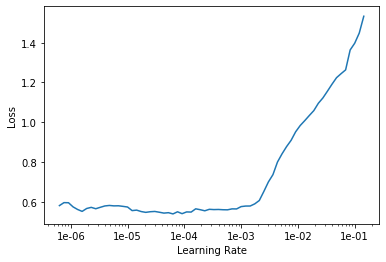

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr = slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.632353,0.846075,0.212598,00:19
1,0.597018,1.029473,0.223097,00:19
2,0.488141,0.608807,0.157480,00:19
3,0.376542,0.550009,0.149606,00:19


In [0]:
learn.save('stage-2')

# Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1526 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
resonator,resonator,resonator,resonator,resonator
Path: /content/gdrive/My Drive/fastai-v3/data/guitars;

Valid: LabelList (381 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
double_neck,resonator,acoustic,acoustic,electric
Path: /content/gdrive/My Drive/fastai-v3/data/guitars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1,

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

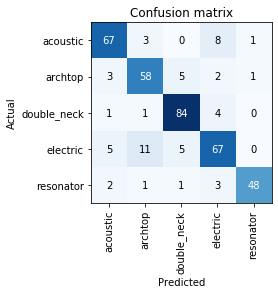

In [0]:
interp.plot_confusion_matrix()

Many errors are due to mislabeled images in the dataset. Since they cant be fixed with fastai in google colab. I deleted some of them manually.

# Putting model in production

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

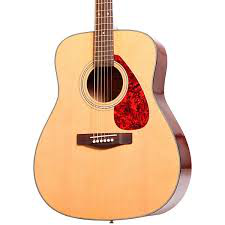

In [0]:
img = open_image(path/'acoustic'/'00000014.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category acoustic